## **Exploratory Data Analysis**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **About Data**

*The data consist of New Yorks iconic yellow taxis recorded and provided by TLC. Records include fields*
1. `VendorID` - Data provided by vendors
2. `tpep_pickup_datetime` - pickup date and time
3. `tpep_dropoff_datetime` - drop off date and time
4. `passenger_count` - number of passengers in taxi
5. `trip_distance` - in miles
6. `RatecodeID` - rate codes
7. `PULocationID` - pickup location
8. `DOLocationID` - dropoff location
9. `payment_type` - mode of payment
10. `fare_amount` - time-distance charge by meter
11. `total_amount` - amount payed by passengers

In [35]:
nyc_taxi = pd.read_pickle("data/nyc_taxi.pickle")

### **Vendors**

*Most of the data is provided by two vendors*
1. **Creative Mobile Technologies, LLC**
2. **VeriFone Inc**
*These two vendors almost charge the `same amount` of money without any significant difference* 

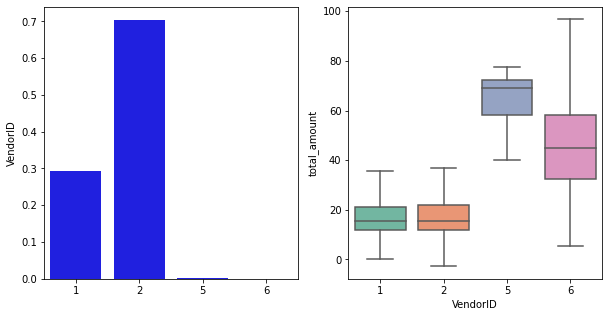

In [96]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,5))
sns.barplot(x = nyc_taxi["VendorID"].unique(), 
            y = nyc_taxi["VendorID"].value_counts().sort_index()/len(nyc_taxi),
            color="blue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "VendorID", y = "total_amount",
            palette= "Set2", showfliers = False,
            ax = axes[1]);

### **RatecodeID**

*The RatecodeId classification is as follows*
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

*Barplot shows a large majority of ratecodes belong to Standard Rate, There is pretty `significant difference` for total amount payed by customers for `different` rate categories as described by the boxplot.*

*Category 2-5 cost significantly more*

*`Category 99` seems to be incorrectly classified and need to be reclassified properly*

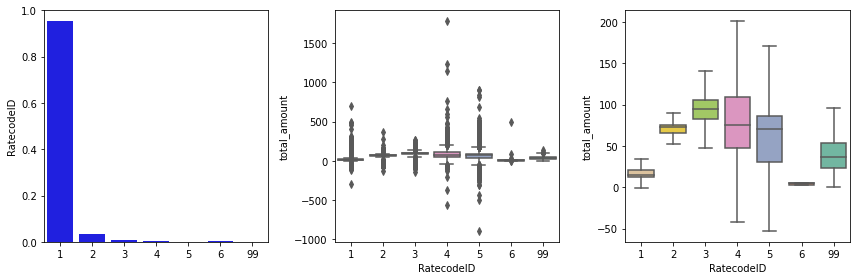

In [94]:
fig, axes = plt.subplots(ncols = 3, figsize=(12,4))
sns.barplot(x = nyc_taxi["RatecodeID"].unique(), 
            y = nyc_taxi["RatecodeID"].value_counts().sort_index()/len(nyc_taxi),
            color="blue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "RatecodeID", y = "total_amount",
            palette="Set2_r", showfliers = True,
            ax = axes[1])
sns.boxplot(data=nyc_taxi,
            x = "RatecodeID", y = "total_amount",
            palette="Set2_r", showfliers = False,
            ax = axes[2])
plt.tight_layout();

### **Payment Type**

*The payment_type is divided into following categories:*

0. Voided trip
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown

*Most of the payments are done through `credit_card`, while `cash` is second major source of payment. On average credit card 
payment is slightly `larger` in amount in comparison to cash payment*

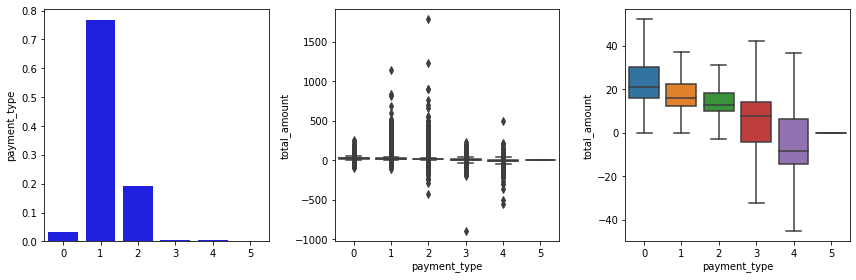

In [100]:
fig, axes = plt.subplots(ncols = 3, figsize=(12,4))
sns.barplot(x = np.sort(nyc_taxi["payment_type"].unique()), 
            y = nyc_taxi["payment_type"].value_counts().sort_index()/len(nyc_taxi),
            color="blue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "payment_type", y = "total_amount",
            palette="tab10", showfliers=True,
            ax = axes[1])
sns.boxplot(data=nyc_taxi,
            x = "payment_type", y = "total_amount",
            palette="tab10", showfliers=False,
            ax = axes[2])
plt.tight_layout();

### **Passenger Count**

In [ ]:
*Majorty of the time 

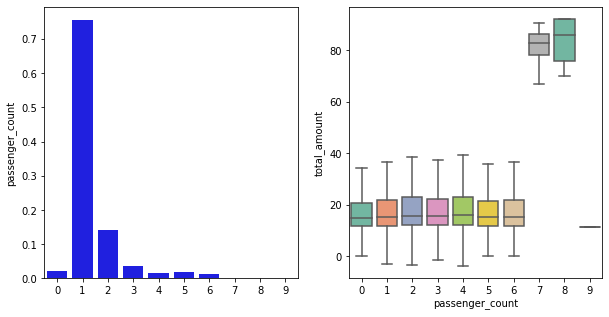

In [112]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,5))
sns.barplot(x = np.sort(nyc_taxi["passenger_count"].unique()), 
            y = nyc_taxi["passenger_count"].value_counts().sort_index()/len(nyc_taxi),
            color="blue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "passenger_count", y = "total_amount",
            palette= "Set2", showfliers = False,
            ax = axes[1]);

In [105]:
nyc_taxi["passenger_count"].value_counts().sort_index()

0      74319
1    2744402
2     509493
3     130829
4      53109
5      69333
6      46365
7         22
8          9
9          1
Name: passenger_count, dtype: int64

In [111]:
np.sort(nyc_taxi["passenger_count"].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)